# Wine Quality
The dataset provided focuses on modeling wine quality based on physicochemical properties (inputs) and sensory data (output). The primary problem is to understand and predict wine quality, scored between 0 (very bad) and 10 (very excellent), using the dataset. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

- Question to Answer:
How can the physicochemical properties of wine be used to predict its quality, and which factors are the most influential?

The data was downloaded from: https://archive.ics.uci.edu/dataset/186/wine+quality.

### Data Explanation
These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

1. The physicochemical properties of wine, such as acidity, sugar content, pH, and alcohol levels, are known to influence sensory perceptions like taste and aroma. These attributes are routinely measured during wine certification and provide a quantifiable basis for analysis. The study uses a large dataset with 4,898 white wine samples and 1,599 red wine samples, making the findings statistically robust. Modeling wine quality using these data provides insights into which properties most influence perceived quality and supports the practical application of data mining to improve wine production and quality assessment. The study confirmed the importance of these variables through sensitivity analysis, highlighting how their variations correlate with sensory quality grades​.

2. The data were gathered from May 2004 to February 2007 from the Minho region of Portugal, covering red and white "vinho verde" wine samples. The samples were tested at the official certification entity (CVRVV) using a computerized system (iLab), which manages testing from producer requests to laboratory and sensory analysis. Each wine sample underwent physicochemical tests (e.g., fixed acidity, residual sugar) and sensory evaluations by at least three assessors, graded on a scale from 0 (very bad) to 10 (excellent). The final dataset included transformed records where each row represented one wine sample with all its test results​.

##### Challenges related to data acquisition/preparation:
- Data Selection: To maintain consistency, only the most common physicochemical tests were selected, potentially excluding other relevant factors.
- Balance in Data: The sensory evaluation scores followed a normal distribution, which might require adjustments for less-represented classes during modeling​.
- Outliers Presence: There is a suspicious that in the data has a lot of outliers, so there is a need for investigation.

### Data Exploration:
In this part, it will be showed the code for the exploration and also what was discovered during this procedure. 

In [ ]:
library(dplyr);
library(GGally);
options(warn=0);

In [ ]:
data1 = read.csv('winequality-white.csv', sep=';')
data2 = read.csv('winequality-red.csv', sep=';')
data1$color = 'white'
data2$color = 'red'
data = rbind(data1,data2)
data$color = as.factor(data$color)


Anexando pacote: 'dplyr'


Os seguintes objetos são mascarados por 'package:stats':

    filter, lag


Os seguintes objetos são mascarados por 'package:base':

    intersect, setdiff, setequal, union




In [74]:
resume = data.frame(round(t(sapply(data[,1:12], function(x) c(min = min(x), mean = mean(x), sd = sd(x), max = max(x), median = median(x)))),1))
resume


,min,mean,sd,max,median
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed.acidity,3.8,7.2,1.3,15.9,7.0
volatile.acidity,0.1,0.3,0.2,1.6,0.3
citric.acid,0.0,0.3,0.1,1.7,0.3
residual.sugar,0.6,5.4,4.8,65.8,3.0
chlorides,0.0,0.1,0.0,0.6,0.0
free.sulfur.dioxide,1.0,30.5,17.7,289.0,29.0
total.sulfur.dioxide,6.0,115.7,56.5,440.0,118.0
density,1.0,1.0,0.0,1.0,1.0
pH,2.7,3.2,0.2,4.0,3.2


Making the summary of data its possible to see that the data has a different scale for each predictor.

##### Boxplot

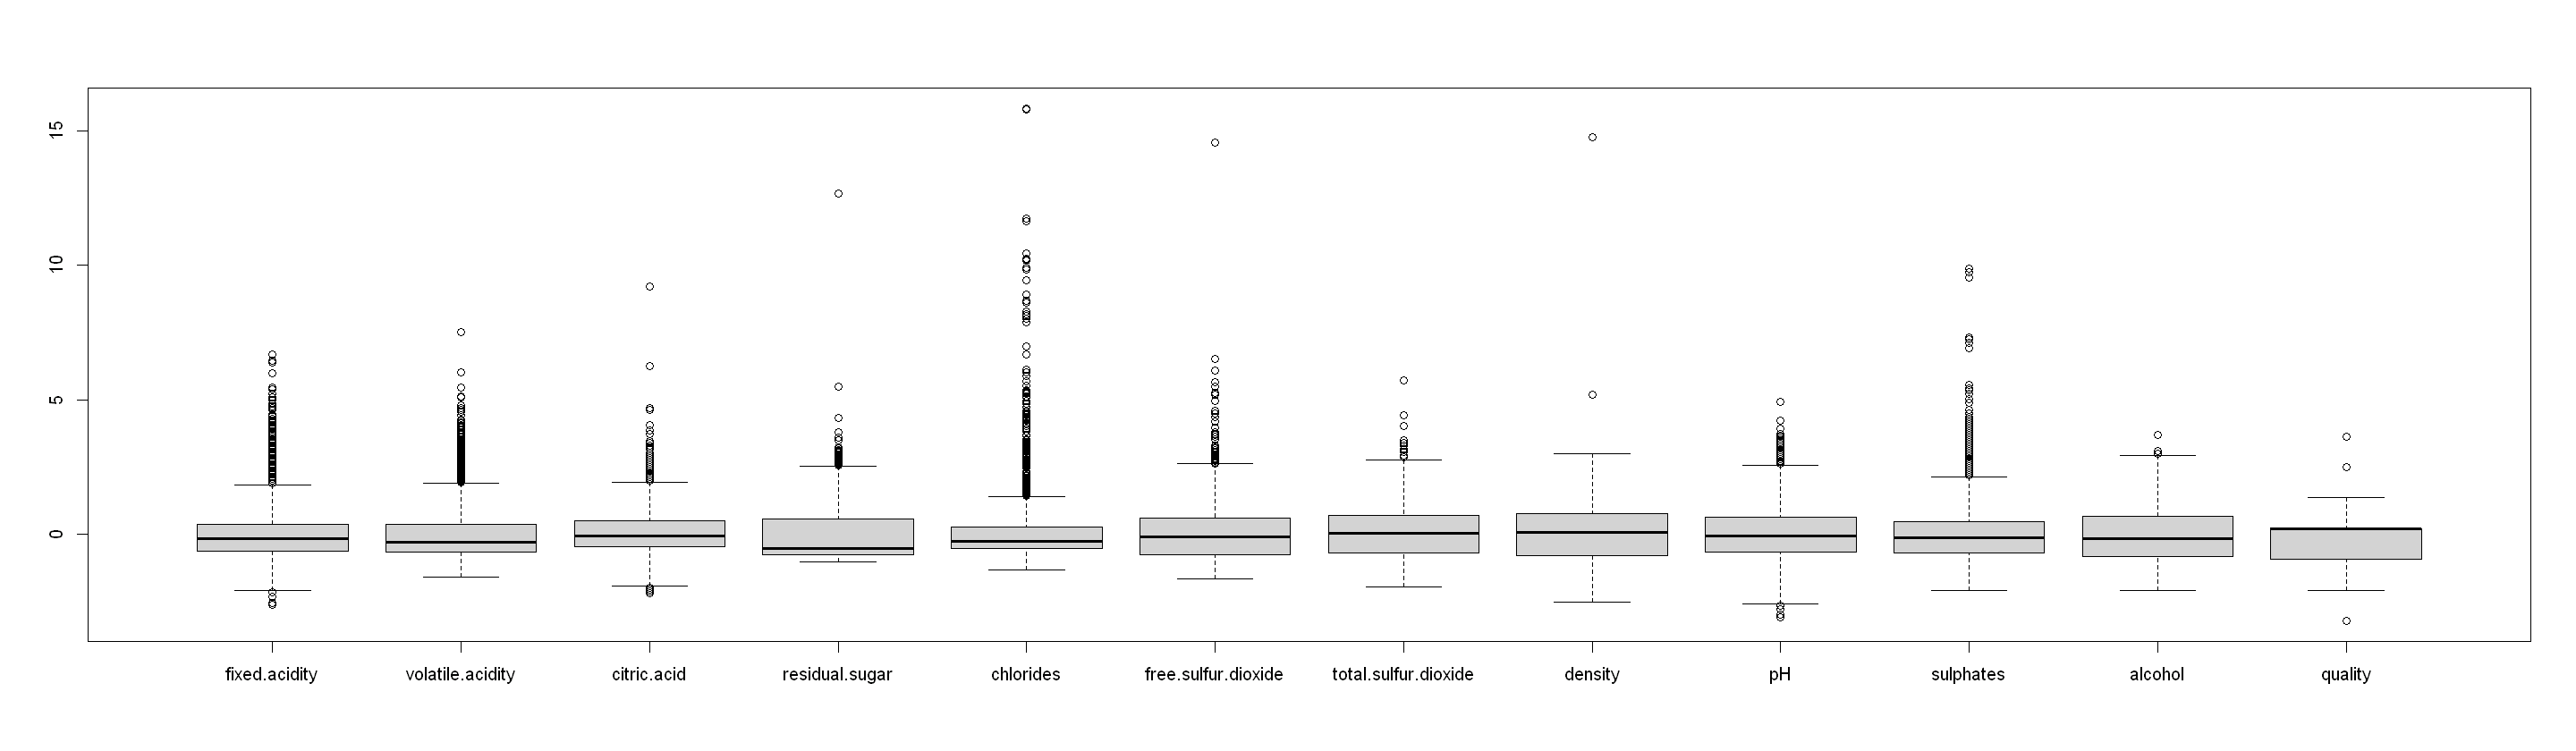

In [20]:
options(repr.plot.width=24)
boxplot(scale(data[,1:12]))
options(repr.plot.width=7)

 - One can notice a lot of outliers in the data. There are several outliers above and below the whiskers, especially for variables like "chlorides," "residual.sugar," "total.sulfur.dioxide," and "free.sulfur.dioxide," suggesting the existence of extreme values in these distributions. Most variables seem to have medians close to the center of the box, indicating approximately symmetric distributions, but some exhibit skewness, such as "residual.sugar," which appears more skewed. Variables like "chlorides" and "sulphates" have narrower interquartile ranges (IQRs), indicating lower variability, while "residual.sugar" shows a wider IQR, suggesting greater dispersion. "Alcohol" and "quality" seem to present a more homogeneous distribution, with fewer outliers and more controlled dispersion, while "chlorides" and "residual.sugar" show a higher incidence of extreme values. The presence of many outliers may impact statistical analyses or predictive models, depending on how the data is handled. Variables with wider IQRs may contribute more to the total variability of the dataset.

##### Assessing predictors distribution
From the boxplot interpretation, one can do a further investigation in the distribuitions of the variables with more outliers.  

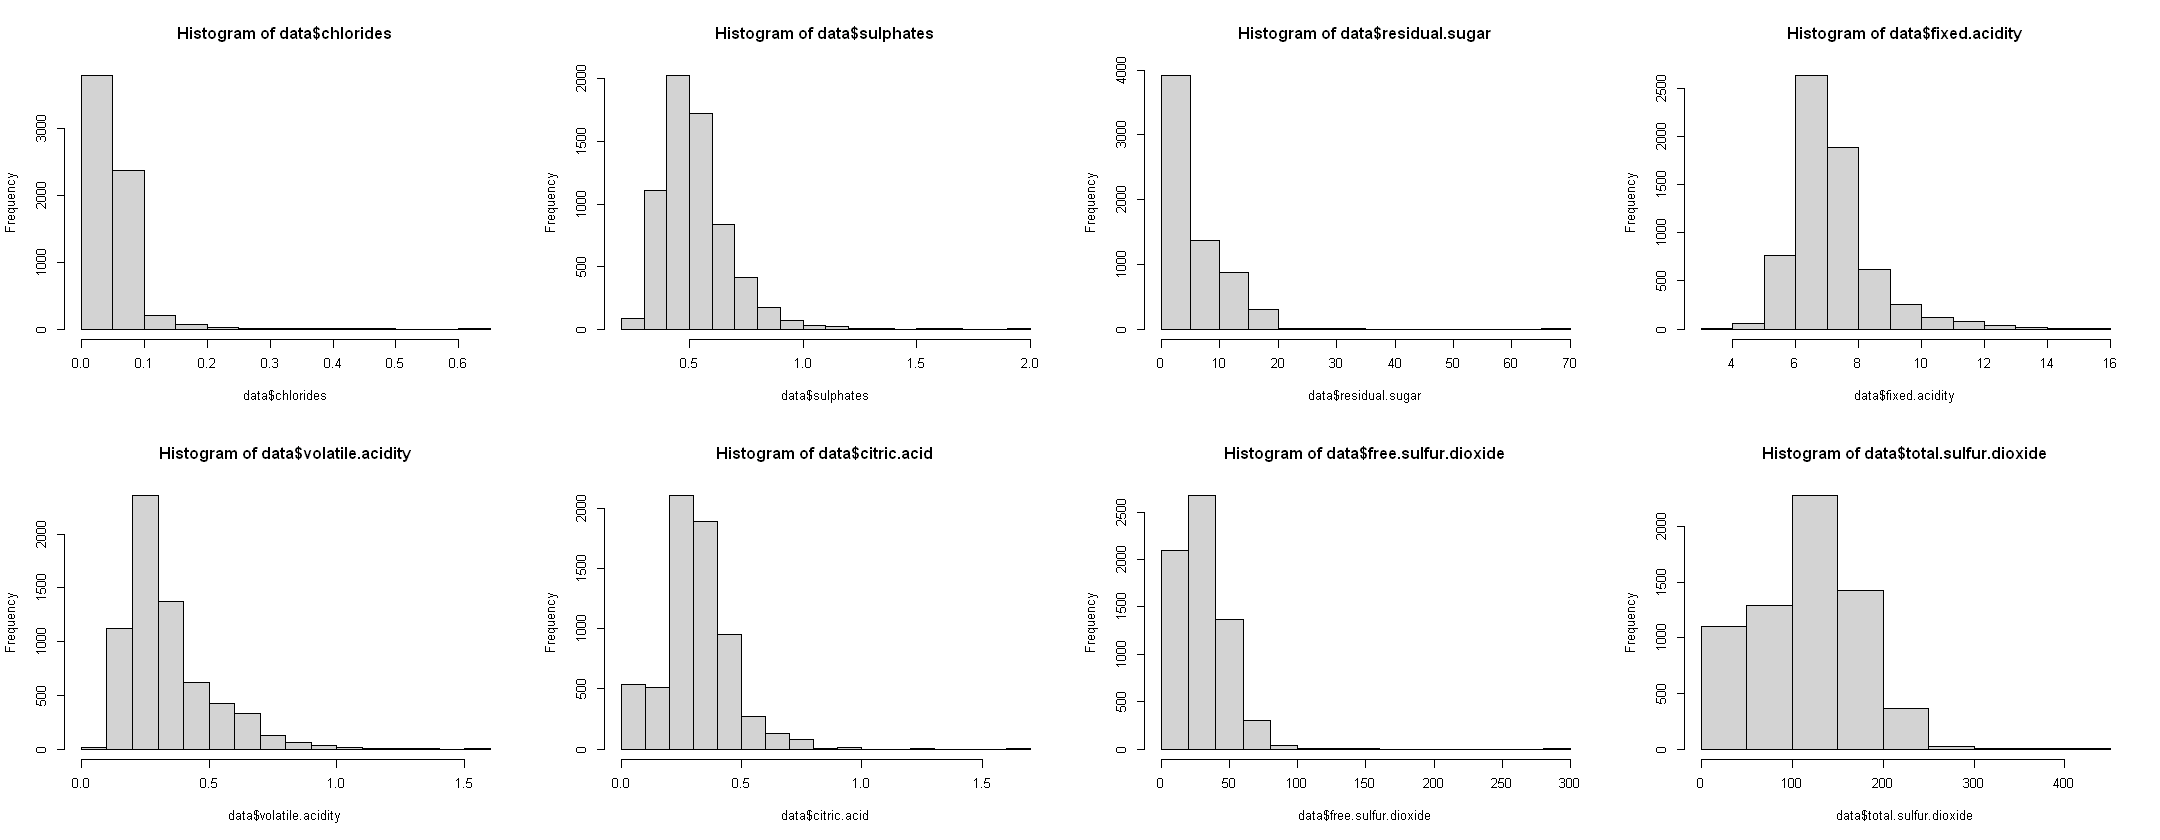

In [36]:
options(repr.plot.width=18)
par(mfrow = c(2,4))
hist(data$chlorides)
hist(data$sulphates)
hist(data$residual.sugar)
hist(data$fixed.acidity)
hist(data$volatile.acidity)
hist(data$citric.acid)
hist(data$free.sulfur.dioxide)
hist(data$total.sulfur.dioxide)
options(repr.plot.width=7)

Considerations:
1. **Chlorides**: Highly right-skewed distribution, with the majority of the data concentrated near lower values.
2. **Residual Sugar**: Strongly right-skewed distribution, with the majority of the data concentrated near very low values (below 10).
3. **Total Sulfur Dioxide**: Strongly right-skewed distribution, with the majority of the data below 150.

These considerations could indicate association with the target variable **quality**. One can do some plots.


##### Asserting high-skewed distributions associations with the target:

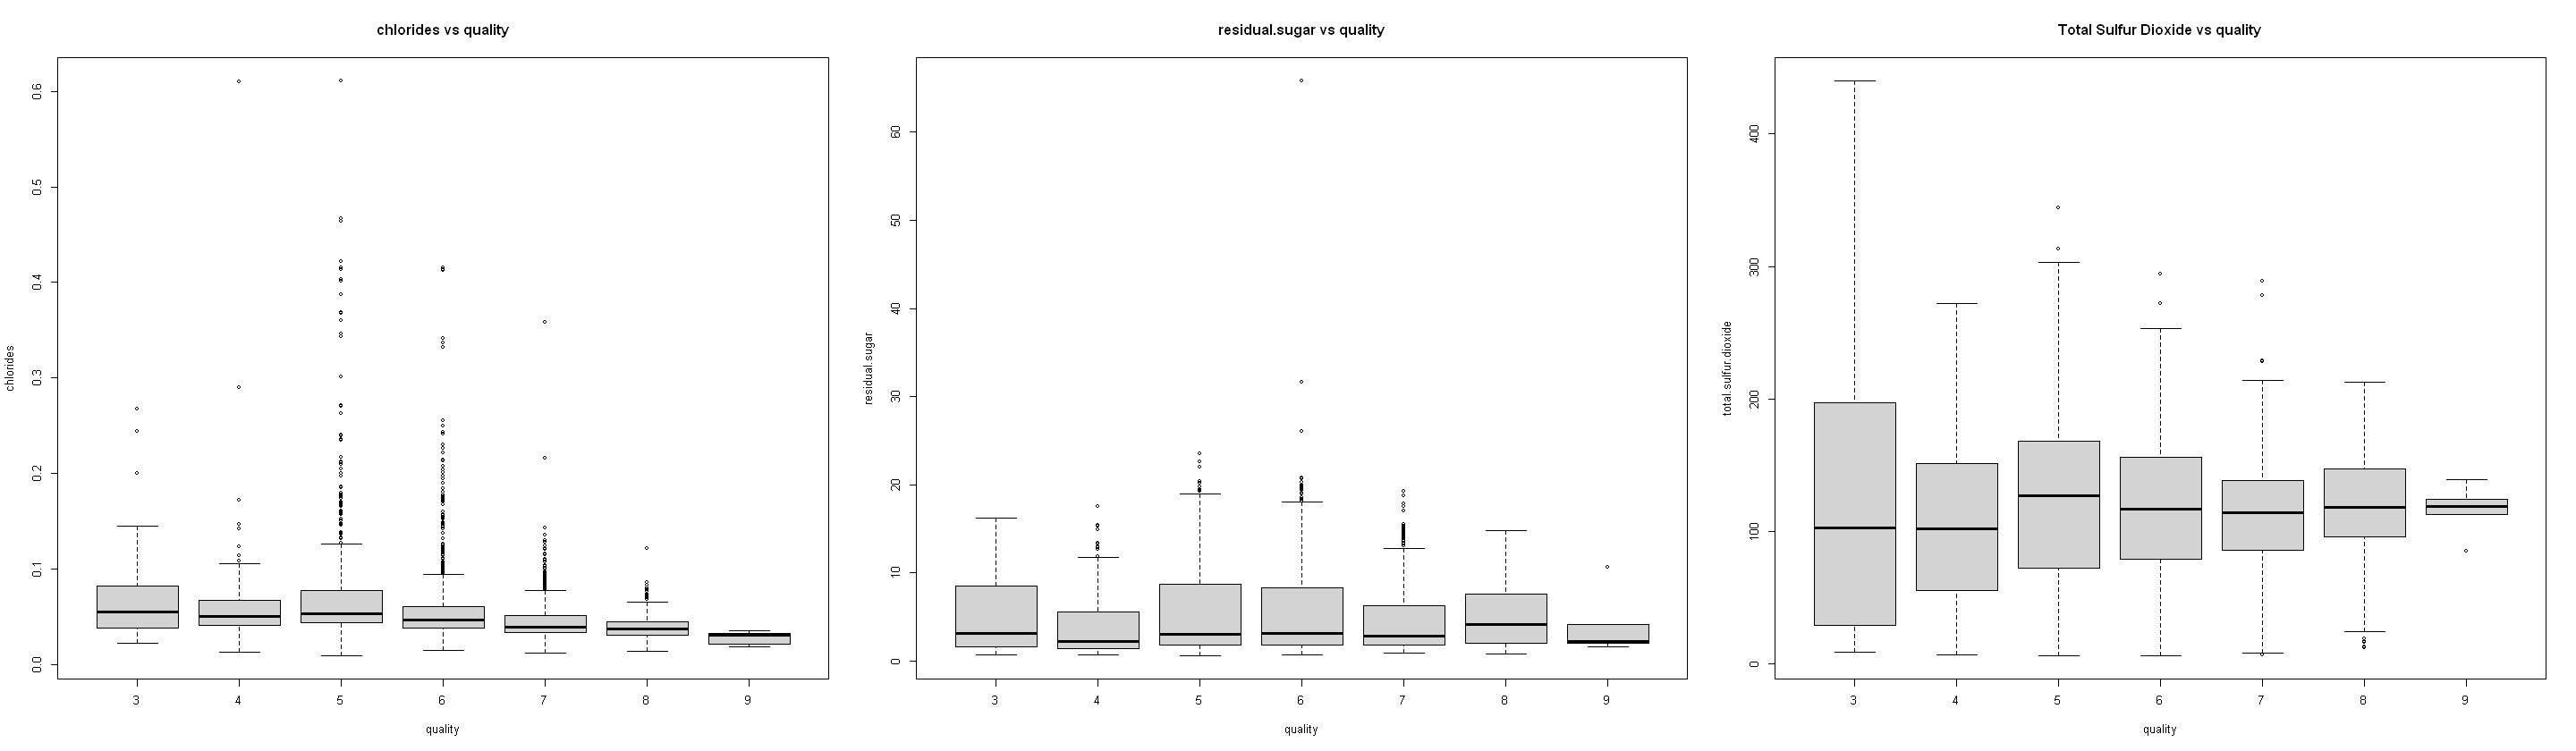

In [58]:
options(repr.plot.width=24)
par(mfrow = c(1,3))
boxplot(chlorides ~ quality, data=data, main= 'chlorides vs quality')
boxplot(residual.sugar ~ quality, data=data, main= 'residual.sugar vs quality')
boxplot(total.sulfur.dioxide ~ quality, data=data, main= 'Total Sulfur Dioxide vs quality')
options(repr.plot.width=7)

Considerations:
1. **Total Sulfur Dioxide vs. Quality**: There appears to be greater variability in total sulfur dioxide for wines with lower quality ratings. As quality increases, the range of total sulfur dioxide values narrows slightly, but the medians do not exhibit a clear monotonic trend. This could suggest a potential weak association, but it would need statistical confirmation.
2. **Residual Sugar vs. Quality**: While there is some variability in residual sugar levels, no consistent increasing or decreasing trend is visible as "quality" changes. This indicates a weak or inconclusive relationship between residual sugar and quality.
3. **Chlorides vs. Quality**: The median and interquartile ranges of chloride concentrations do not show a clear pattern or trend as "quality" increases. This suggests that chlorides may not have a strong or clear association with wine quality.

##### Correlations:
Since are many predictors with the same domain (acidity), may be useful to asserting possible correlations:

geom_bar: na.rm = FALSE, orientation = NA
stat_bin: binwidth = NULL, bins = 30, center = NULL, boundary = NULL, breaks = NULL, closed = c("right", "left"), pad = FALSE, na.rm = FALSE, orientation = NA
position_stack 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


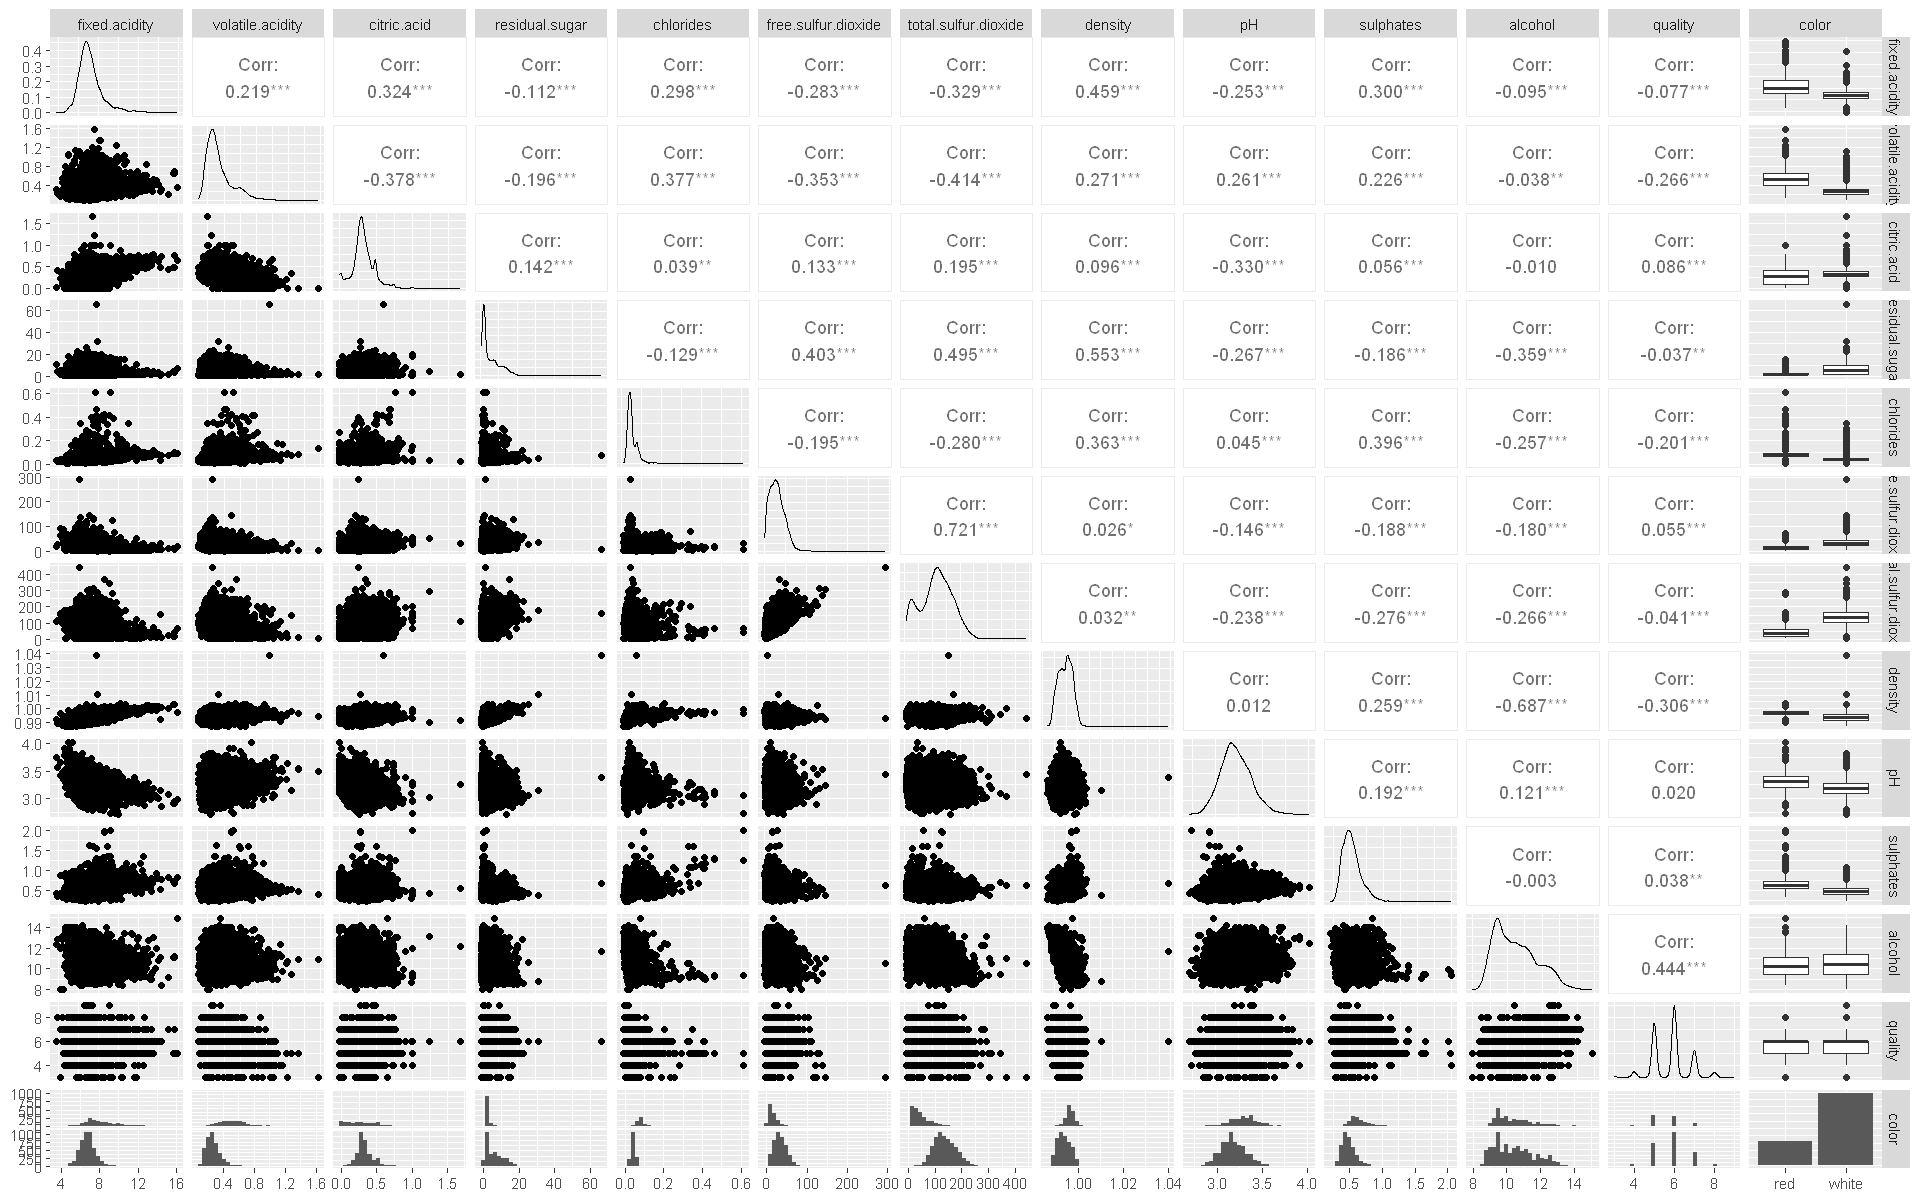

In [64]:
#install.packages('GGally')
options(repr.plot.width=16, repr.plot.height=10)
ggpairs(data)
options(repr.plot.width=7, repr.plot.height=7)

Considerations:
 - Residual sugar has a weak correlation with free sulfur, total sulfur and density.
 - Alcohol has a weak correlation with density.
 - free sulfur and total sulfur has a strong correlation, as expected. 

### Cleaning Data:
- Frow previous part was possible to identify possible problems that can lead to poor performance modelling. So we will clean the data and remove predictors with high correlation.

In [ ]:
a = data[,1:12]
filter(a,a <= resume$sd)

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `a <= resume$sd`.
[1mCaused by error:[22m
[1m[22m[33m![39m `..1` must be a logical vector, not a logical matrix.


In [ ]:
data %>% select()